# Project Report Evaluating WASM Implementations

The purpose of this project is to
- understand the efficiency of each generated Webassembly file
- set up an ideal benchmark to determine the efficiency
- understand the result of the benchmark

###### Author: Dong Chen
###### Class: 4tb3/6tb3
###### April 16th, 2021

# Introduction
Today, there are many languages that use WebAssembly as an intermediate language. A list of all languages that currently have some form of WebAssembly integration is listed in https://github.com/appcypher/awesome-wasm-langs. In this project, the author will introduce the following three new languages, includes AssemblyScript, Go, Rust, and P0. A benchmark test will be implemented to perform two tasks.
- A linear task, iterate n times.
- A exponential task, find the Fibonacci Sequence.

TypeScript
``` TypeScript
export function climb(n: i32): i32 {
  var a = 0;
  while(a < n){
    a = a + 1;
  }
  return a
}

export function fib(n: i32): i32 {
  var a = 0
  if (n === 0) return 0
  if (n === 1) return 1

  a = fib(n-1) + fib(n-2)
  return a
}
```

# JavaScript Evaluation as Intermediate 
    In order to make the benchmark more reliable, a JavaScript equivalent method will be introduced. There are several reasons why having equivalent JavaScript methods will help to deliver more accurate results.
    
    Most generated WebAssembly files will be loaded in the local web browser. At the same time, the JavaScript method will be loaded. In such case, the JavaScript performs in the same environment that WebAssembly files will perform, so it could exclude a lot of noise.
    
    JavaScript as a reference for the industrial average. Then, we could discover the efficiency of WebAssembly files compares to Javascript. Last, a method called timer will log the execution time on each WebAssembly file. The following are the Javascript methods for two benchmark tasks and the timer.

``` html
<html>
<body>
  <script>
    function simpleClimb(n) {
                var a = 0
                while (a < n) { a++;}
                return a;
    }

    function simpleFib(n) {
                var a = 0
                if (n === 0) return 0
                if (n === 1) return 1

                a = simpleFib(n-1) + simpleFib(n-2)
                return a;
    }

    function timer(fn, input) {
                console.time("timer");
                fn(input);
                console.timeEnd("timer");
    }

    fetch('climb.wasm').then(response =>
      response.arrayBuffer()
    ).then(bytes =>
      WebAssembly.instantiate(bytes, {imports: {}})
    ).then(results => {
      window.climb = results.instance.exports.climb;
    });
  </script>
</body>
</html>
```

Timer and simpleFib are written in plain JavaScript, simpleFib is an equivalent method to the fib/climb method in generated wasm file. The timer method is to track how long an operation takes. The timer logs the start and end time in the browser, and it is a key method to measure execution time in this project.

# Demo how to run each Webassembly file in the browser
Please reference setupall.pdf to set up your environment to run this benchmark.
</br>
<img style="width:40em;" src="./img/go-test.png"></img>

# Benchmark

- Test in Chrome Version 89.0.4389.114
- OS: macOS Big Sur 11.2.3 
- CPU: 2.9 GHz Dual-Core Intel Core i5

The Webassemly files generated by AssemblyScript, Go, Rust, will be tested in the local browser, the inputs are listed below. 
- input in climb = [100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 500000000, 1000000000] (exponent)
- input in fib = [1, 5, 10, 15, 20, 25, 30, 35, 40, 41, 42, 43, 44, 45, 50]

In [1]:
# Inputs of fibonacci sequence 
fib_range_1_50 = [1, 5, 10, 15, 20, 25, 30, 35, 40, 41, 42, 43, 44, 45, 50]

# Assemblyscript wasm results in fib
fib_as_1_50 = [0.003173, 0.004150, 0.002929, 0.010986, 0.084960, 
               0.898193, 12.91162, 121.9440, 1399.376, 2158.877, 
               3371.235, 5483.011, 8941.161, 14318.21, 151937.0]

# JavaScript results in fib
fib_js_as_1_50 = [0.004882, 0.010986, 0.017089, 0.128906, 2.239990, 
                  1.795654, 19.08105, 172.9931, 1786.391, 2850.632, 
                  4655.699, 7323.510, 11790.56, 19066.86, 253357.8]

# Go wasm results in fib
fib_go_1_50 = [0.340820, 0.323974, 0.151123, 0.210937, 0.527099, 
               4.117187, 45.27709, 440.2539, 4883.194, 7890.422, 
               12691.84, 21574.85, 33360.44, 53604.88, 599487.0]

# JavaScript results in fib
fib_js_go_1_50 = [0.004150, 0.0083007, 0.026123, 0.161865, 2.3269042,
                  1.969238, 18.824951, 171.0061, 1783.681, 2994.2290, 
                  4550.933, 7319.6530, 11806.60, 19066.37, 247948.74]

# Rust wasm results in fib
fib_rust_1_50 = [0.0029296, 0.0039062, 0.0058593, 0.0161132, 0.1689453, 
                 1.223144, 13.85009, 122.4821, 1232.617, 1955.020, 
                 3134.131, 5036.819, 8093.654, 13097.22, 153580.7]

# JavaScript results in fib
fib_js_rust_1_50 = [0.050048, 0.0078125, 0.022949, 0.146728, 2.258056, 
                    1.852050, 19.000732, 168.4877, 1780.969, 2839.147,
                    4553.250, 7300.2858, 11791.987, 20112.0, 260460.8]

# Inputs of climb method
climb_range = [100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 500000000, 1000000000]

# Assemblyscript wasm results in climb
climb_as_1_10 = [0.416992, 1.852783, 4.050048, 18.49291, 38.96704, 
                 156.1159, 296.7768, 1474.004, 2915.280]

# Assemblyscript wasm results in climb
climb_js_1_10 = [2.352050, 0.9399414, 2.199951, 4.566894, 8.846923, 
                 45.02197, 84.59716, 329.6652, 676.0600]

# Go wasm results in climb
climb_go_1_10 = [1.098144, 2.203125, 4.236083, 17.32910, 49.84301,
                 169.1889, 1586.651, 2932.589, 14760.39]

# Rust wasm results in climb
climb_rust_1_10 = [0.004150, 0.004882, 0.00512695, 0.004882, 0.006103, 
                   0.006103, 0.005126, 0.00390625, 0.005126]

### AssemblyScript, Go, Rust Test in Climb method

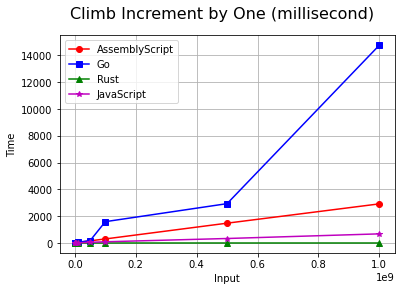

In [2]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(climb_range, climb_as_1_10, 'ro-', label='AssemblyScript')
ax1.plot(climb_range, climb_go_1_10, 'bs-', label='Go')
ax1.plot(climb_range, climb_rust_1_10, 'g^-', label='Rust')
ax1.plot(climb_range, climb_js_1_10, 'm*-', label='JavaScript')

fig.suptitle('Climb Increment by One (millisecond)', fontsize=16)
ax1.set_xlabel('Input')
ax1.set_ylabel('Time')
ax1.legend()
ax1.grid(True)

From the graph, it is not hard to observe that the climb method has linear time complexity. In general, some generated Webassmebly files outperforms Javascript, some didn't. 
</br>
##### JavaScript Outperform some Webassembly
- Webassembly designs for running heavy intense tasks in a web browser. When the test method is simple or less complicated, Javascript actually performs pretty well. 

### Compare with JavaScript in Climb method

Text(0.5, 0.98, 'Webassembly vs JavaScript (millisecond)')

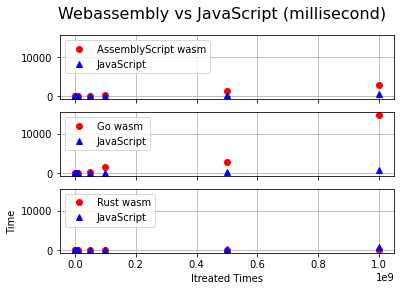

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)

ax1.plot(climb_range, climb_as_1_10, 'ro', label='AssemblyScript wasm')
ax1.plot(climb_range, climb_js_1_10, 'b^', label='JavaScript')

ax2.plot(climb_range, climb_go_1_10, 'ro', label='Go wasm')
ax2.plot(climb_range, climb_js_1_10, 'b^', label='JavaScript')

ax3.plot(climb_range, climb_rust_1_10, 'ro', label='Rust wasm')
ax3.plot(climb_range, climb_js_1_10, 'b^', label='JavaScript')

ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
ax3.legend(loc="upper left")

ax1.grid(True)

ax2.grid(True)

ax3.grid(True)
ax3.set_xlabel('Itreated Times')
ax3.set_ylabel('Time')

fig.suptitle('Webassembly vs JavaScript (millisecond)', fontsize=16)

In the simple task, Javascript actually performs very well compare other three Webassembly files. It is sligtly behind Rust wasm.

### AssemblyScript, Go, Rust Test in Fibonacci Sequence

Text(0.5, 0.98, 'Webassembly vs JavaScript (millisecond)')

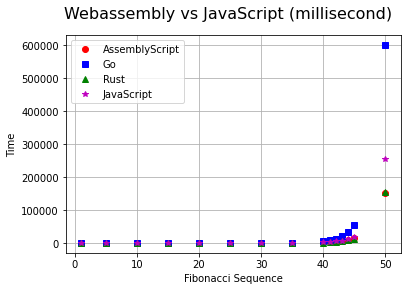

In [4]:
fig, ax1 = plt.subplots()
ax1.plot(fib_range_1_50, fib_as_1_50, 'ro', label='AssemblyScript')
ax1.plot(fib_range_1_50, fib_go_1_50, 'bs', label='Go')
ax1.plot(fib_range_1_50, fib_rust_1_50, 'g^', label='Rust')
ax1.plot(fib_range_1_50, fib_js_as_1_50, 'm*', label='JavaScript')
ax1.legend(loc="upper left")
ax1.grid(True)
ax1.set_xlabel('Fibonacci Sequence')
ax1.set_ylabel('Time')
fig.suptitle('Webassembly vs JavaScript (millisecond)', fontsize=16)

From the graph, it is not hard to observe that the fib method has 2^n (exponent) time complexity. In general, generated Webassmebly outperforms JavaScript, except Go wasm.

##### Most Webassembly Outperform some JavaScript
When it comes to more intense work, JavaScript runs behind.

### Compare with JavaScript in Fibonacci Sequence

Text(0.5, 0.98, 'Webassembly vs JavaScript (millisecond)')

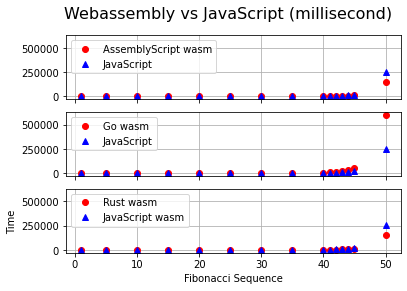

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)

ax1.plot(fib_range_1_50, fib_as_1_50, 'ro', label='AssemblyScript wasm')
ax1.plot(fib_range_1_50, fib_js_as_1_50, 'b^', label='JavaScript')

ax2.plot(fib_range_1_50, fib_go_1_50, 'ro', label='Go wasm')
ax2.plot(fib_range_1_50, fib_js_go_1_50, 'b^', label='JavaScript')

ax3.plot(fib_range_1_50, fib_rust_1_50, 'ro', label='Rust wasm')
ax3.plot(fib_range_1_50, fib_js_rust_1_50, 'b^', label='JavaScript wasm')

ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
ax3.legend(loc="upper left")

ax1.grid(True)

ax2.grid(True)

ax3.grid(True)
ax3.set_xlabel('Fibonacci Sequence')
ax3.set_ylabel('Time')

fig.suptitle('Webassembly vs JavaScript (millisecond)', fontsize=16)

AssemblyScript and Rust wasm file seems to do very well in the recursion test. In general, Webassmebly has a smaller size, and the code is close to machine code. JavaScript, dynamic type, types need to be inferred first, before optimization. Webassmebly is a static type.

# Size and Optimization in wasm

| Language        | FileSize Climb(bytes) | FileSize Fibonacci(bytes) | Optimization    | Line of Code in Fibonacci |
| --------------- |:---------------------:| -------------------------:|----------------:| -------------------------:|
| AssemblyScript  | 122                   | 132                       | Yes(small size) | 39                        |
| Go              | 1,374,028             | 1,374,791                 | No, but self-contained  | 418884            |
| Rust            | 1,543,020             | 1,543,076                 | Yes(heap)       | 13799                     |
| P0              | 147                   | 174                       | Yes(small size) | 53                        |

The size of wasm files generated by AssemblyScript and P0 are very light. On the other hand, the size of wasm files generated by Go and Rust are pretty large. 
<br />

### Why Go file so large? 
The go wasm is a self-contained binary file. It contains all the features to interact with Javascript. It provides better safeness. In the Go file, we have to import syscall/js, this file gives access to the WebAssembly host environment. The wasm has a huge table to hold 5064 function references.

### Why Rust file so large? 
If you open the generated file. Rust has a Heap implemented in the wasm file. The heap implementation explains why Rust has a large file but still performs well in each task. Especially, in a linear task, Rust execution time is almost constant all the time. The Rust wasm has 15 function references. Rust WebAssembly support still in development. The most popular one is to use Emscripten, a compiler that compiles C/C++ to WebAssembly. For the purpose of studying, the author uses the Rust its own undergoing support.

### No Tree Shaking
Tree shaking is a dead code elimination technique that is applied in optimization. The Rust and Go are designed for the backend. In most cases, the size usually is not a priority on the server-side.

### Heap in Rust
Currently, Webassembely has no direct access to the garbage-collected heap, there is an on going proposal to add interface types to Webassembely. https://github.com/WebAssembly/interface-types/blob/master/proposals/interface-types/Explainer.md
The Rust wasm use the garbage-collected heap via JavaScript.

Text(0, 0.5, 'Time')

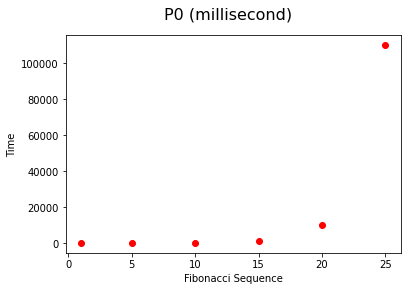

In [6]:
## P0 graph
fib_p0 = [55, 103, 225, 1040, 10100, 110000]
range_1_6 = [1,5,10,15,20,25]
fig, ax1 = plt.subplots()
fig.suptitle('P0 (millisecond)', fontsize=16)
ax1.plot(range_1_6, fib_p0, 'ro')
ax1.set_xlabel('Fibonacci Sequence')
ax1.set_ylabel('Time')

P0 access python API to access read() and write(). This increases the execution time. In contrast, if we make the function exposed anyone can access the function in each generated wasm file by local browser consoles.

# Front-end and Backend

| Language        | Front| Backend | 
| --------------- |:---------------------:| -------------------------:|
| AssemblyScript  | Yes, Subset of TypeScirpt - a Javascript with types                   | No                       |
| Go              | No            | Yes                 |
| Rust            | No, but has the potential             | Yes                 |
| P0              | You can tell                   | Never try it before                       |

    It turns out it does matter what front-end technology to perform better results. The browser is a very light engine, it is not ideal to load large files or pretty intensive work.

    AssemblyScript is designed for front-end development, the wasm files generated are very light. The local browser can load the AssemblyScript wasm very quickly, and perform desirable works. 

    The Go and Rust are mainly used for backend technology. It has an additional API to talk with JavaScript, such as using a heap via JavaScript API. In the experiment, the Rust wasm has a heap implementation. However, with a file size of 1.5 MB, it is not ideal for the browser to load it, compare to a much smaller size as AssemblyScript created.

    Currently, not all languages are fully integrated with Webassembely Support. Base on the observation, a front-end language is adapting Webassembly well than back-end language.

# Summary and Insgihts
Some languages are designed for different purposes. With the right technology, it can deliver desirable results. Today, companies usually need to spend a lot of time on finding the right technology for building the new project or for transforming the existed system into the new system. Adopting the right technology in the front-end or back-end can impact the performance significantly. The project uses JavaScript as an intermediate to evaluate each Webassembly file. In general, a language designed for the front-end would have a good performance on running tasks in the browser. A language that is designed for the backend has mixed performance on running tasks in the browser. 

# Challenge of this Project

- Still growing, select right candidates, planning is key.
- Deal with endless technical problems with Webassembly and new languages.
- Exclude the noise, find an ideal environment. Not ideal compare P0 with the other three.
- Understand the result.

# Development Statistics
- 4 languages
- 2 Go files, 2 TypeScript files, 2 Rust files, 8 wasm files, 8 html files, 1 js file
- A environment set up documentation in pdf version created by latex
- Implementation code: 285  (exclude P0 related files)
- 66 commits